In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.shape

(1599, 12)

In [ ]:
data = data.drop_duplicates()
data.shape

In [3]:
data.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Outlier Treatment
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = pd.DataFrame(data)

# Calculate the Z-Score for each data point
z_scores = (data - data.mean()) / data.std()

# Set a Z-Score threshold for outliers (e.g., Z-Score > 3 or Z-Score < -3)
threshold = 3

# Identify outliers
outliers = z_scores[abs(z_scores) > threshold]
outlier_counts = outliers.apply(lambda col: col.count())
print(outlier_counts)


fixed acidity           12
volatile acidity        10
citric acid              1
residual sugar          30
chlorides               31
free sulfur dioxide     22
total sulfur dioxide    15
density                 18
pH                       8
sulphates               27
alcohol                  8
quality                 10
dtype: int64


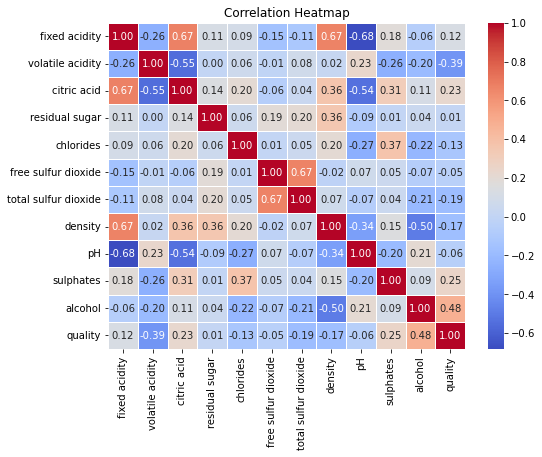

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data.drop('quality',axis=1)
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.9)
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [8]:
x=data.drop(['citric acid','residual sugar','free sulfur dioxide','total sulfur dioxide','density','quality','pH'],axis=1)
y=data['pH']
print(x)
# x=(x-x.mean())/x.std()
# for x_column in x.columns:
#     plt.scatter(x[x_column], y, label=x_column)

      fixed acidity  volatile acidity  chlorides  sulphates  alcohol
0               7.4             0.700      0.076       0.56      9.4
1               7.8             0.880      0.098       0.68      9.8
2               7.8             0.760      0.092       0.65      9.8
3              11.2             0.280      0.075       0.58      9.8
4               7.4             0.700      0.076       0.56      9.4
...             ...               ...        ...        ...      ...
1594            6.2             0.600      0.090       0.58     10.5
1595            5.9             0.550      0.062       0.76     11.2
1596            6.3             0.510      0.076       0.75     11.0
1597            5.9             0.645      0.075       0.71     10.2
1598            6.0             0.310      0.067       0.66     11.0

[1599 rows x 5 columns]


In [9]:
X=x.values
Y=y.values.reshape((-1,1))
Y.shape

(1599, 1)

In [10]:
ones=np.ones((X.shape[0],1))
X_=np.hstack((X,ones))
print(X_[:5,:])

[[ 7.4    0.7    0.076  0.56   9.4    1.   ]
 [ 7.8    0.88   0.098  0.68   9.8    1.   ]
 [ 7.8    0.76   0.092  0.65   9.8    1.   ]
 [11.2    0.28   0.075  0.58   9.8    1.   ]
 [ 7.4    0.7    0.076  0.56   9.4    1.   ]]


In [11]:
def predict(X,theta):
    return np.dot(X,theta)

def closedform(X,y):
    y=y.values.reshape((-1,1))
    Y=np.mat(y)
    f=np.dot(X.T,X)
    l=np.dot(X.T,Y)
    theta=np.linalg.pinv(f).dot(l)
    return theta

In [12]:
X=pd.DataFrame(X_)
Y=pd.DataFrame(Y)
df=pd.concat([X, Y], axis=1)
train_set = df.sample(frac=0.8, random_state=1)
test_set = df.drop(train_set.index)
X_train=train_set.iloc[:,:-1]
Y_train=train_set.iloc[:,-1]
X_test=test_set.iloc[:,:-1]
Y_test=test_set.iloc[:,-1]
print(X_train.shape)
print(Y_train.values.reshape((-1,1)).shape)
print(X_test.shape)
print(Y_test.values.reshape((-1,1)).shape)

(1279, 6)
(1279, 1)
(320, 6)
(320, 1)


In [13]:
theta=closedform(X_train,Y_train)
print(theta)
predictions=predict(X_test,theta)
pred=[]
for x in predictions:
    #print(x[0,0])
    pred.append(x[0,0])

[[-0.05504275]
 [ 0.09667131]
 [-0.59192603]
 [ 0.00377581]
 [ 0.02069166]
 [ 3.55008908]]


<IPython.core.display.Javascript object>


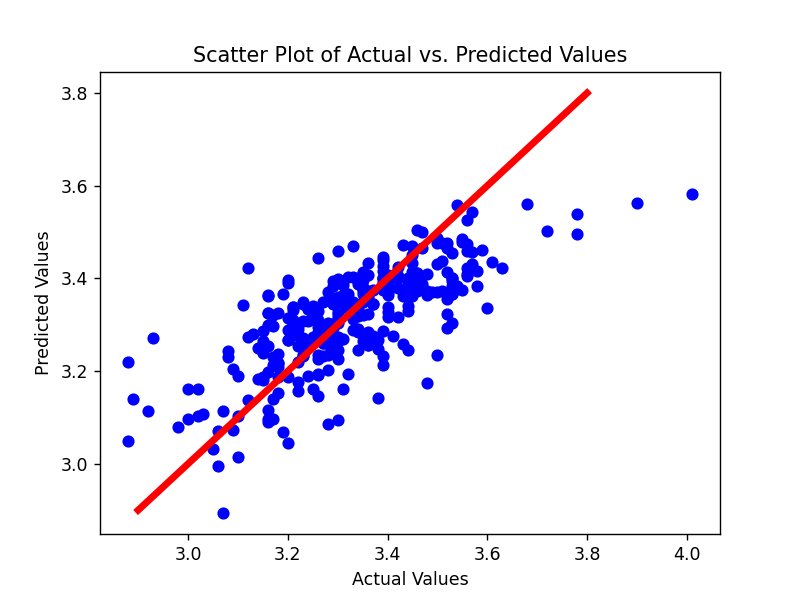

In [30]:
Y_actual=Y_test.tolist()
Y_predictions = pred
plt.scatter(Y_actual, Y_predictions, color='b', marker='o', label='Actual vs. Predicted')
xx = np.linspace(2.9, 3.8, 100)
# Add labels and a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.plot( xx,xx, color='r', label='Regression Line', linewidth=4)
# Show the plot
plt.show()
plt.savefig('linear_regression.png')

In [28]:
%matplotlib notebook
# %matplotlib inline

In [25]:
theta2=closedform(X_train,Y_train)
#print(X_train)
predictions2=predict(X_train,theta2)
pred2=[]
for x in predictions2:
    pred2.append(x[0,0])
diff=[]
for x, y in zip(Y_train, pred2):
    diff.append((x-y)**2)
sum_value = np.sum(diff)
print(sum_value)
print(len(diff))
loss = (sum_value)/len(Y_test)
loss

14.002569037957107
1279


0.04375802824361596